In [2]:
import tinyflux
import pandas as pd

In [7]:
with tinyflux.TinyFlux(r"C:\Users\holmest1\OneDrive - Greater Western Water\Desktop\data.csv.bak-20240401130000") as tf:
    measurements = tf.get_measurements()
    
    for measurement in measurements:
        print(measurement)
        fields = {f: (min(tf.get_field_values(field_key=f, measurement=measurement)), max(tf.get_field_values(field_key=f, measurement=measurement))) for f in tf.get_field_keys(measurement=measurement)}
        tags = tf.get_tag_values(measurement=measurement)
        print(fields)
        print(tags)
        print()

climate
{'air_temp': (2.9, 30.6), 'rel_hum': (17.0, 100.0)}
{'source': ['BOM'], 'loc_name': ['Ballan (CFA)', 'Essendon Airport', 'Kilmore Gap', 'Trentham East (CFA)']}

power_usage
{'current_power': (0.0, 14.0)}
{'site': ['p110'], 'devices_connected': ['home-server,']}



In [21]:
print(tags)

{'site': ['p110'], 'devices_connected': ['home-server,']}


In [49]:
from tinyflux import MeasurementQuery, TagQuery

with tinyflux.TinyFlux(r"C:\Users\holmest1\OneDrive - Greater Western Water\Desktop\data.csv.bak-20240401130000") as tf:
    tags = tf.get_tag_values(measurement='climate')
    dfs = []
    for loc in tags['loc_name']:
        mq = MeasurementQuery()
        tq = TagQuery()
        query = (mq == 'climate') & (tq.loc_name == loc)
        points = tf.search(query)
        dfs.append(
            pd.DataFrame(
                data={
                    loc: [p.fields['air_temp'] for p in points]
                },
                index=[p.time for p in points] # drop tz
            )
            .reset_index()
            .drop_duplicates(subset='index', keep='first')
            .set_index('index')
        )

df = pd.concat(dfs, axis=1, join='outer').sort_index().ffill()
display(df)

,Ballan (CFA),Essendon Airport,Kilmore Gap,Trentham East (CFA)
index,,,,
2024-03-15 15:40:00+00:00,NaN,NaN,NaN,21.8
2024-03-15 15:50:00+00:00,NaN,NaN,NaN,21.8
2024-03-15 16:00:00+00:00,NaN,NaN,NaN,22.1
2024-03-15 16:10:00+00:00,NaN,NaN,NaN,22.5
2024-03-15 16:20:00+00:00,NaN,NaN,NaN,22.5
...,...,...,...,...
2024-04-01 21:56:00+00:00,16.1,18.9,16.2,14.7
2024-04-01 22:00:00+00:00,16.1,18.6,16.2,14.6
2024-04-01 22:10:00+00:00,16.0,18.6,16.2,14.6


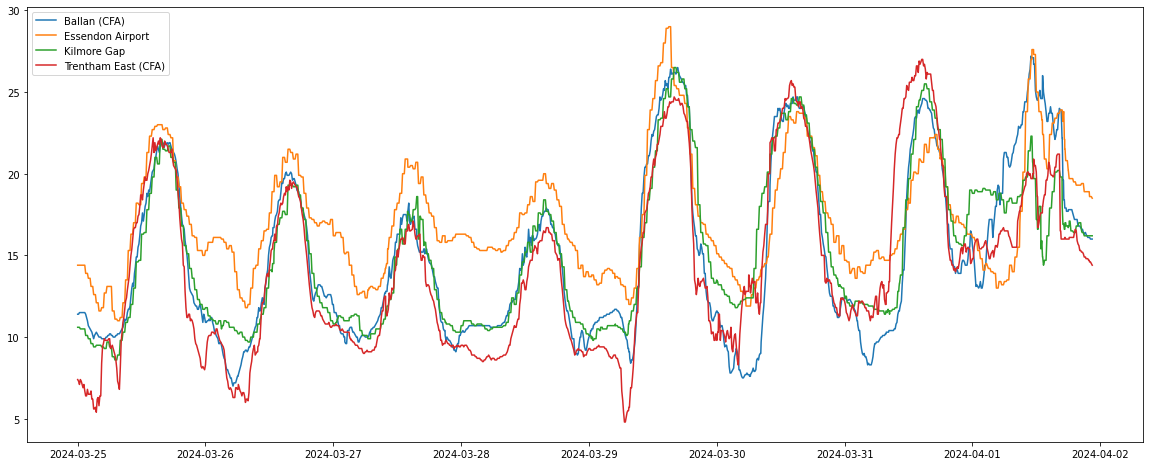

In [60]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
for loc in df.columns:
    ax.plot(df['2024-03-25':].index, df['2024-03-25':][loc], label=loc)
plt.legend()
plt.show()